### Week 4 - Time Series Analysis and Pairs Trading
In this week we'll take a dive into time series and understand important concepts like stationarity, cointegration, and rolling linear regression.

This flavor of quantitiative finance is often refered to as statistical arbitrage since we'll use statistical tools to identify and test hypothesis we're making about stocks. 

Todo: talk about mean, standard deviation.

Todo: talk about hypothesis testing, null/alt hypothesis, p value.

Todo: talk about financial derivatives.

### Def: stationary time series
A time series (technically a stochastic process) is stationary if the probability distribution does not change when shifted in time.  In essense, this means that the mean of the time series is constant.  

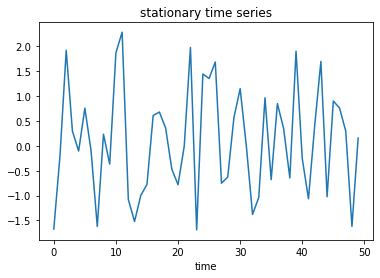

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# let's generate a random vector that can model a stock time series
X = np.random.normal(0, 1, size=(50, 1))  # draw 50 values from a normal distribution N(0, 1)
plt.plot(X)
plt.xlabel("time")
plt.title("stationary time series")
plt.show()

What we notice about this time series is that although it's entirely random, we still can say that the mean is constant at about 0.  This is significant because oftentimes we don't have constant mean time series in assets since they tend to appreciate over time.  Thus, we have good reason to believe that this time series is stationary.

### Def: non-stationary time series
A time series is non-stationary if the probability distribution changes throughout time.  This basically means that it has a non-constant mean or standard deviation.

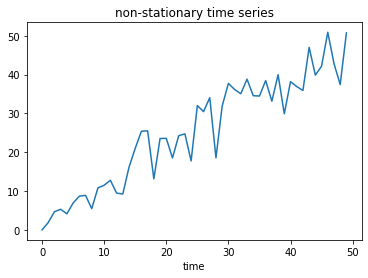

In [21]:
Y = [np.random.normal(x, np.sqrt(x)) for x in range(50)]  # draw from random normal N(mu, sigma)
plt.plot(Y)
plt.xlabel("time")
plt.title("non-stationary time series")
plt.show()

This is something closer to what we would expect for an asset since the price increases over time.  It doesn't really make sense to talk about the mean of a time series like this since at any given point in our time, the mean will be different for a different time.

The obvious question, therefore, is how can we make this non-constant mean time series look like the first one.  

Don't worry, this next definition has nothing to do with the integration that you know from calculus (well technically it does in a very interesting way, but the formalism is not the point here).

### Def: order of integration
We define the order of integration I(d) of a time series $T_i$ as the number of first differences required to make the time series stationary.  By first difference we basically mean subtracting the time series by itself shifted over by 1, namely $T_i - T_{i-1}$

From this we see that a stationary time series is I(0), which we call integrative of order 0.

Let's look at the first difference for our non-stationary time series.

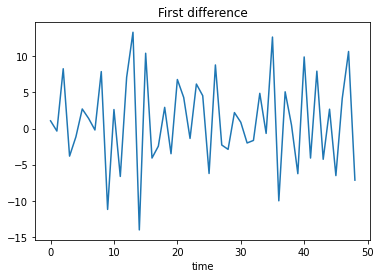

In [20]:
Y = [np.random.normal(x, np.sqrt(x)) for x in range(50)]
first_diff = np.diff(Y)
plt.plot(first_diff)
plt.xlabel("time")
plt.title("First difference")
plt.show()

We see that this time series looks very similar to the first time series that we plotted since the mean and standard deviation look constant throughout the entire time series.  This gives us a good reason to believe that the time series is stationary.

In fact, we can use a statistical hypthesis test to test if we have good reason to believe if a time series is stationary.

### Augmented Dicky-Fuller Test
**$H_0$** the time series is stationary.

**$H_1$** the time series is not stationary.


In [77]:
from statsmodels.tsa.stattools import adfuller  # Augmented Dicky-Fuller

def test_stationarity(data, level=.01):
    # return true if likely stationary
    p_value = adfuller(data)[1]
    print("p value: ", p_value)
    if p_value < level:
        return False
    return True

X = np.random.normal(0, 1, size=(50, 1))
test_stationarity(X)

p value:  1.7079574816594778e-10


False

At the significance level of .01, we reject the null hypothesis that this time series is stationary.

Now let's try this out on our non-stationary time series.

In [78]:
Y = [np.random.normal(x, np.sqrt(x)) for x in range(50)]
test_stationarity(Y)

p value:  0.7012790593931844


True

Our p value is above the significance level, so we do not reject the null hypothesis that the time series is stationary.

Let's see what happens after we apply the first difference.

In [79]:
Y = [np.random.normal(x, np.sqrt(x)) for x in range(50)]
first_diff = np.diff(Y)
test_stationarity(first_diff)
# reject null hypothesis

p value:  4.853988879070708e-07


False

### Pairs Trading - theory

Now let's talk about multiple time series.  The idea is that we have two time series that are correlated, and we want to trade them as a pair instead of as two individual assets.

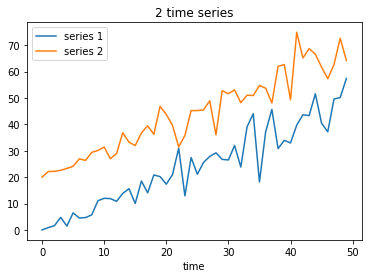

In [32]:
series1 = [np.random.normal(x, np.sqrt(x)) for x in range(50)]
series2 = [np.random.normal(x + 20, np.sqrt(x)) for x in range(50)]
plt.plot(series1, label="series 1")
plt.plot(series2, label="series 2")
plt.xlabel("time")
plt.title("2 time series")
plt.legend()
plt.show()

We see these two time series seem to exhibit a lot of the same behavior.  Although they don't move identically, they have a strong correlation.  If these were real assets we could use this knowledge to our advantage to make a hedged bet about the pair's movement depending on if they converge/diverge.

### Def: Cointegration
Two time series $T_i$ and $S_i$ are cointegrated if $T_i$ and $S_i$ are both $I(1)$ and there a real exists $\alpha$ such that $\epsilon_i = T_i - \alpha S_i$ is $I(0)$.

To unpack this a bit, we want a linear combination of two time series to be stationary (since $\epsilon_i$ should just be random noise).

To find $\alpha$, we can do ordinary least squares regression.


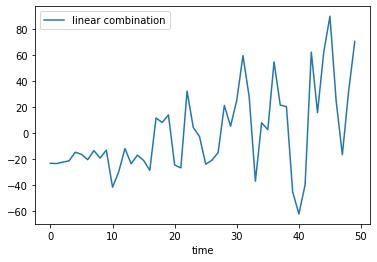

p value:  0.003098596996722561


False

In [83]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
series1 = [np.random.normal(x, x) for x in range(50)]
series2 = [np.random.normal(x + 20, x) for x in range(50)]


series1 = add_constant(series1)
model = OLS(series2, series1)
results = model.fit()
y_intercept, slope = results.params
series1 = np.array([x[1] for x in series1])
series2 = np.array(series2)

comb_series = series2 - series1 * slope - y_intercept
plt.plot(comb_series, label="linear combination")
plt.xlabel("time")
plt.legend()
plt.show()

test_stationarity(comb_series)

This gives us series2 = series1 * slope - y-intercept

Thus we see that this linear combination time series is stationary, exactly as we wanted.  This won't always be the case since these values are generated randomly.  Results will be much nicer once we operate on real financial data in the next section.